## MOVIE RATING ANALYTICS (ADVANCED VISULIZATION)

In [8]:
import pandas as pd
import os

In [9]:
os.getcwd() # if you want to change the working directory

'C:\\Users\\TANISHQ\\Naresh_IT_Everyday_Personal'

In [10]:
movies = pd.read_csv(r"C:\\Users\\TANISHQ\\Naresh_IT_Everyday_Personal\Movie-Rating.csv")

In [11]:
movies

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [12]:
type(movies)

pandas.core.frame.DataFrame

In [13]:
len(movies)

559

In [14]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [15]:
movies.shape

(559, 6)

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [17]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [18]:
movies.columns = ['Film','Genre','CriticRating','AudienceRating','BudgetMillions','Year']

In [19]:
movies.head(3)  # Removed spaces & % removed noise characters

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009


In [20]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


- If you look at the year the data type is int but when you look at the mean value it showing 2009 which is meaningless
- Here we dont need statistics of Year, it has no use. So to remove it we must change its Data type from int to category. Because .describe() takes only int dtype.

- Also from object datatype we will convert to category datatypes

In [22]:
 movies.Year = movies.Year.astype('category')

In [23]:
# Simillarly
movies.Genre = movies.Genre.astype('category')
movies.Film = movies.Film.astype('category')

In [24]:
movies.info() # memory usage increased as we changed object to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [25]:
movies

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [26]:
movies.Film.cat.categories
#.cat --> Accessor object for categorical properties of the Series values.
#.categories --> The categories of this categorical column.

Index(['(500) Days of Summer ', '10,000 B.C.', '12 Rounds ', '127 Hours',
       '17 Again ', '2012', '27 Dresses', '30 Days of Night',
       '30 Minutes or Less', '50/50',
       ...
       'Yes Man', 'Yogi Bear', 'You Again', 'You Don't Mess with the Zohan',
       'You Will Meet a Tall Dark Stranger', 'Your Highness',
       'Youth in Revolt', 'Zodiac', 'Zombieland ', 'Zookeeper'],
      dtype='object', length=559)

In [27]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

###### 

## Plots

In [30]:
from matplotlib import pyplot as plt  # visualisation
# import matplotlib.pyplot as plt   # same as above code
import seaborn as sns # Advanced visualisation

%matplotlib inline   
# All the plot should be inside the line

import warnings  
warnings.filterwarnings('ignore')  # To ignore warnings

* basically joint plot is a scatter plot & it find the relation b/w audiene & critics
* also if you look up you can find the uniform distribution (critics)and normal distriution (audience)

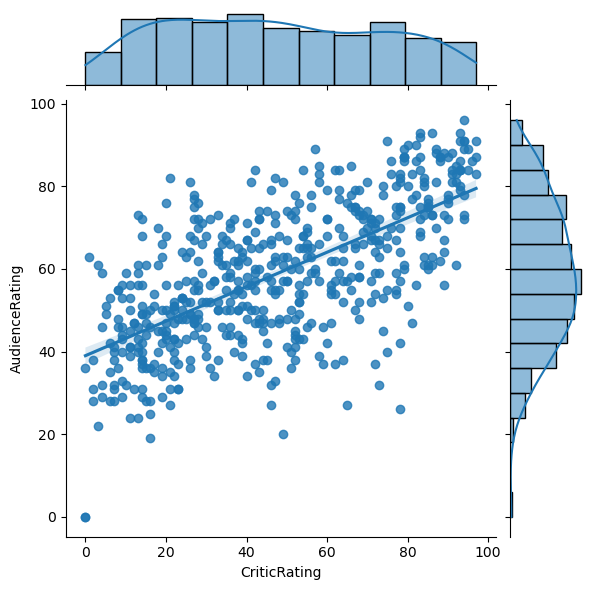

In [32]:
x = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='reg')

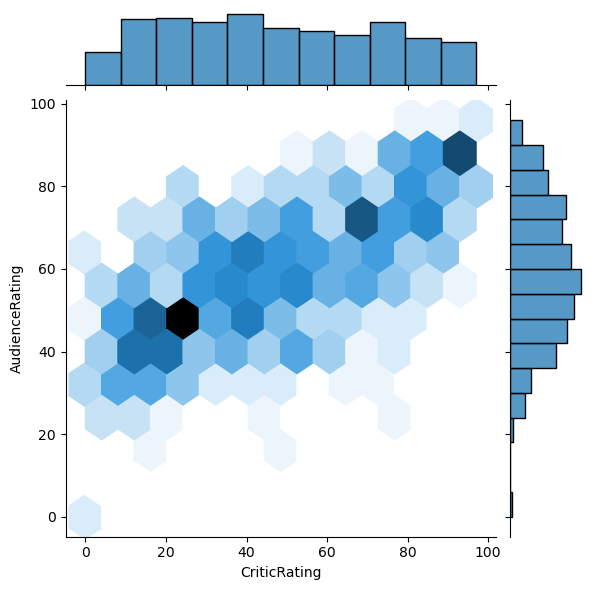

In [33]:
x = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

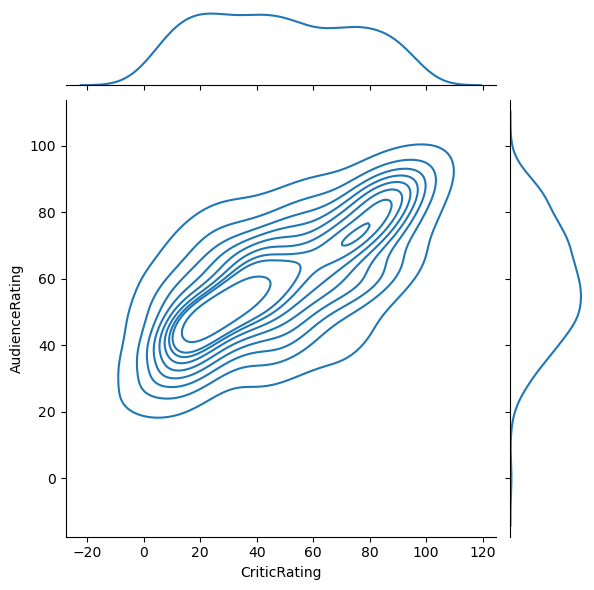

In [34]:
x = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='kde')

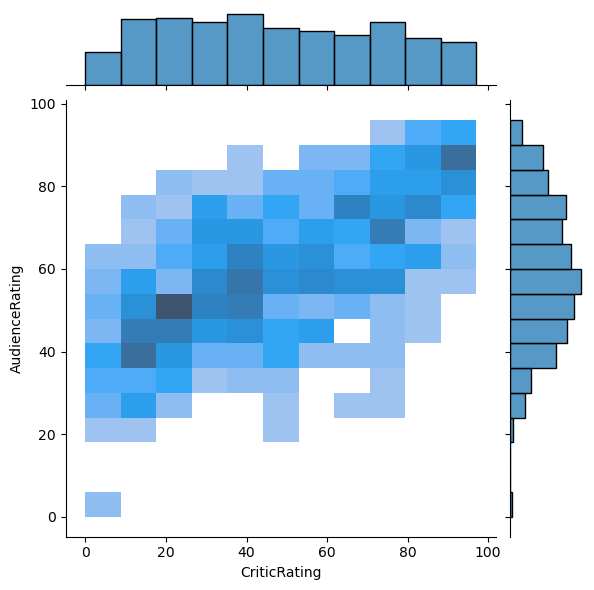

In [35]:
x = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hist')

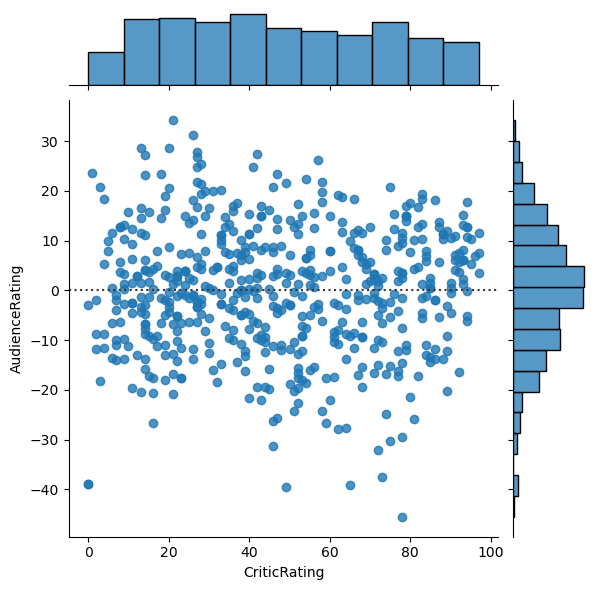

In [36]:
x = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='resid')

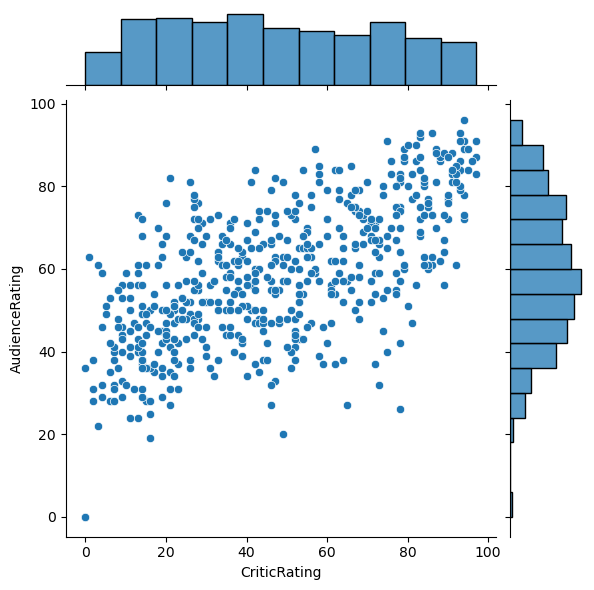

In [37]:
x = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='scatter')

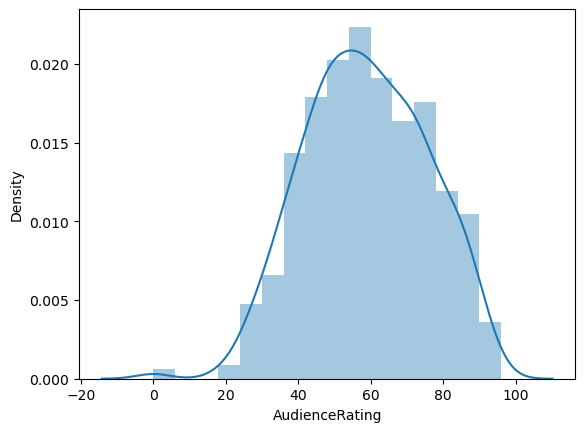

In [38]:
m = sns.distplot(movies.AudienceRating)

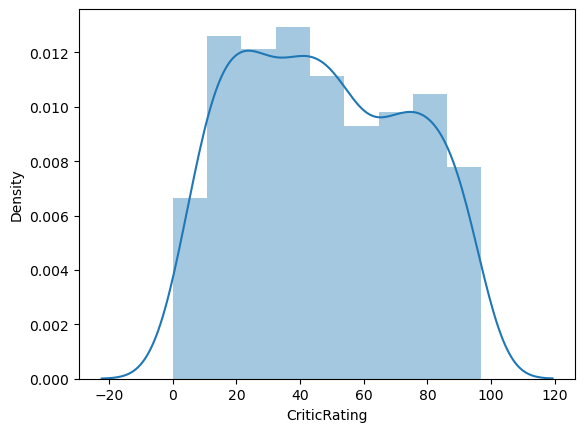

In [39]:
m = sns.distplot(movies.CriticRating)

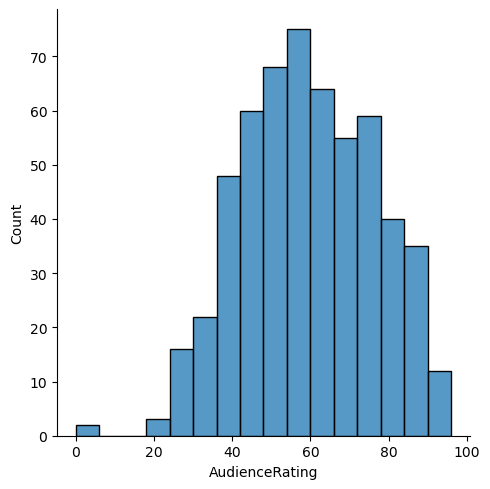

In [40]:
m = sns.displot(movies.AudienceRating)

In [41]:
sns.set_style('darkgrid')

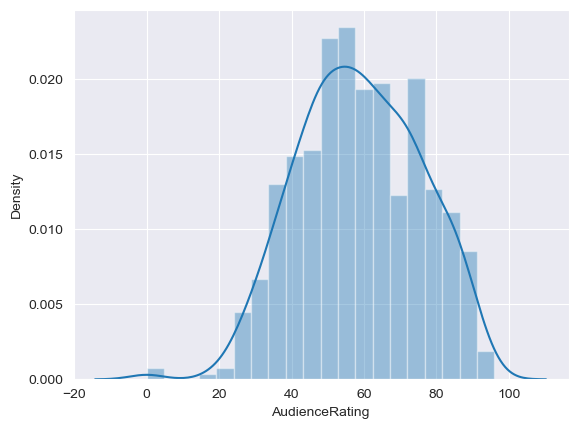

In [42]:
m1 = sns.distplot(movies.AudienceRating, bins=20)

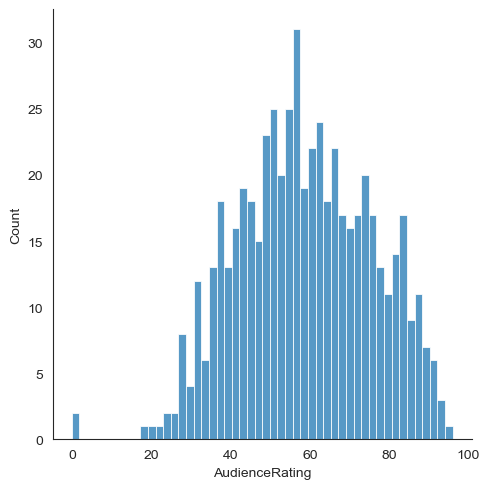

In [43]:
sns.set_style('white')
m2 = sns.displot(movies.AudienceRating, bins=50)

In [44]:
 n = sns.hist(movies.AudienceRating, bins=20)
# Error because .hist() is a matplotlib function

AttributeError: module 'seaborn' has no attribute 'hist'

In [ ]:
n = plt.hist(movies.AudienceRating, bins=20)

### Uniform Distribution: Visualized as a histogram with roughly equal frequencies across the specified range.

### Normal Distribution: Visualized as a histogram with a bell-shaped curve.

In [ ]:
n1 = plt.hist(movies.CriticRating, bins=20) #uniform distribution

###### 

## Creating stacked histograms

In [ ]:
plt.hist(movies.BudgetMillions)
plt.show()

In [ ]:
plt.hist(movies[movies.BudgetMillions <= 100].Genre)
plt.show()

In [ ]:
plt.hist(movies[movies.Genre == 'Comedy'].BudgetMillions)
plt.show()
#x-axis--> BudgetMillions
#y-axis--> number of Genre == 'Comedy' 

In [ ]:
movies.head()

In [ ]:
movies.Genre.unique()
# here we can see total unique genres, we have 7 type of genres

In [ ]:
plt.hist(movies[movies.Genre=='Action'].BudgetMillions, bins = 20)
plt.hist(movies[movies.Genre=='Thriller'].BudgetMillions, bins = 20)
plt.hist(movies[movies.Genre=='Drama'].BudgetMillions, bins = 20)
plt.show()

In [ ]:
plt.hist([movies[movies.Genre=='Action'].BudgetMillions,\
         movies[movies.Genre == 'Drama'].BudgetMillions, \
         movies[movies.Genre == 'Thriller'].BudgetMillions, \
         movies[movies.Genre == 'Comedy'].BudgetMillions],
         bins = 5)

In [ ]:
plt.hist([movies[movies.Genre=='Action'].BudgetMillions,\
         movies[movies.Genre == 'Drama'].BudgetMillions, \
         movies[movies.Genre == 'Thriller'].BudgetMillions, \
         movies[movies.Genre == 'Comedy'].BudgetMillions],
         bins = 20, stacked=True)
plt.show()

#### If you have 100 categories you cannot copy & paste all the things

In [ ]:
for gen in movies.Genre.cat.categories:
    print(gen)

In [ ]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                 fit_reg=False)

In [ ]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                 fit_reg=False, hue = 'Genre')

In [ ]:
a = sns.boxplot(data=movies, x='Genre',y='CriticRating')

In [ ]:
a = sns.violinplot(data=movies, x='Genre',y='CriticRating')

In [ ]:
b = sns.boxplot(data=movies[movies.Genre == 'Drama'], y ='CriticRating', x ='Year')

In [ ]:
z = sns.kdeplot(data=movies, x='CriticRating', y='AudienceRating')

In [ ]:
z = sns.kdeplot(data=movies, x='CriticRating', y='AudienceRating', shade=True, shade_lowest=False,cmap='Reds')

In [ ]:
sns.set_style('dark')
z = sns.kdeplot(data=movies, x='CriticRating', y='AudienceRating', shade=True, shade_lowest=False,cmap='Blues')

###### 

## Facet Grid

A facet grid is a data visualization technique used to create multiple subplots, each representing a subset of the data.

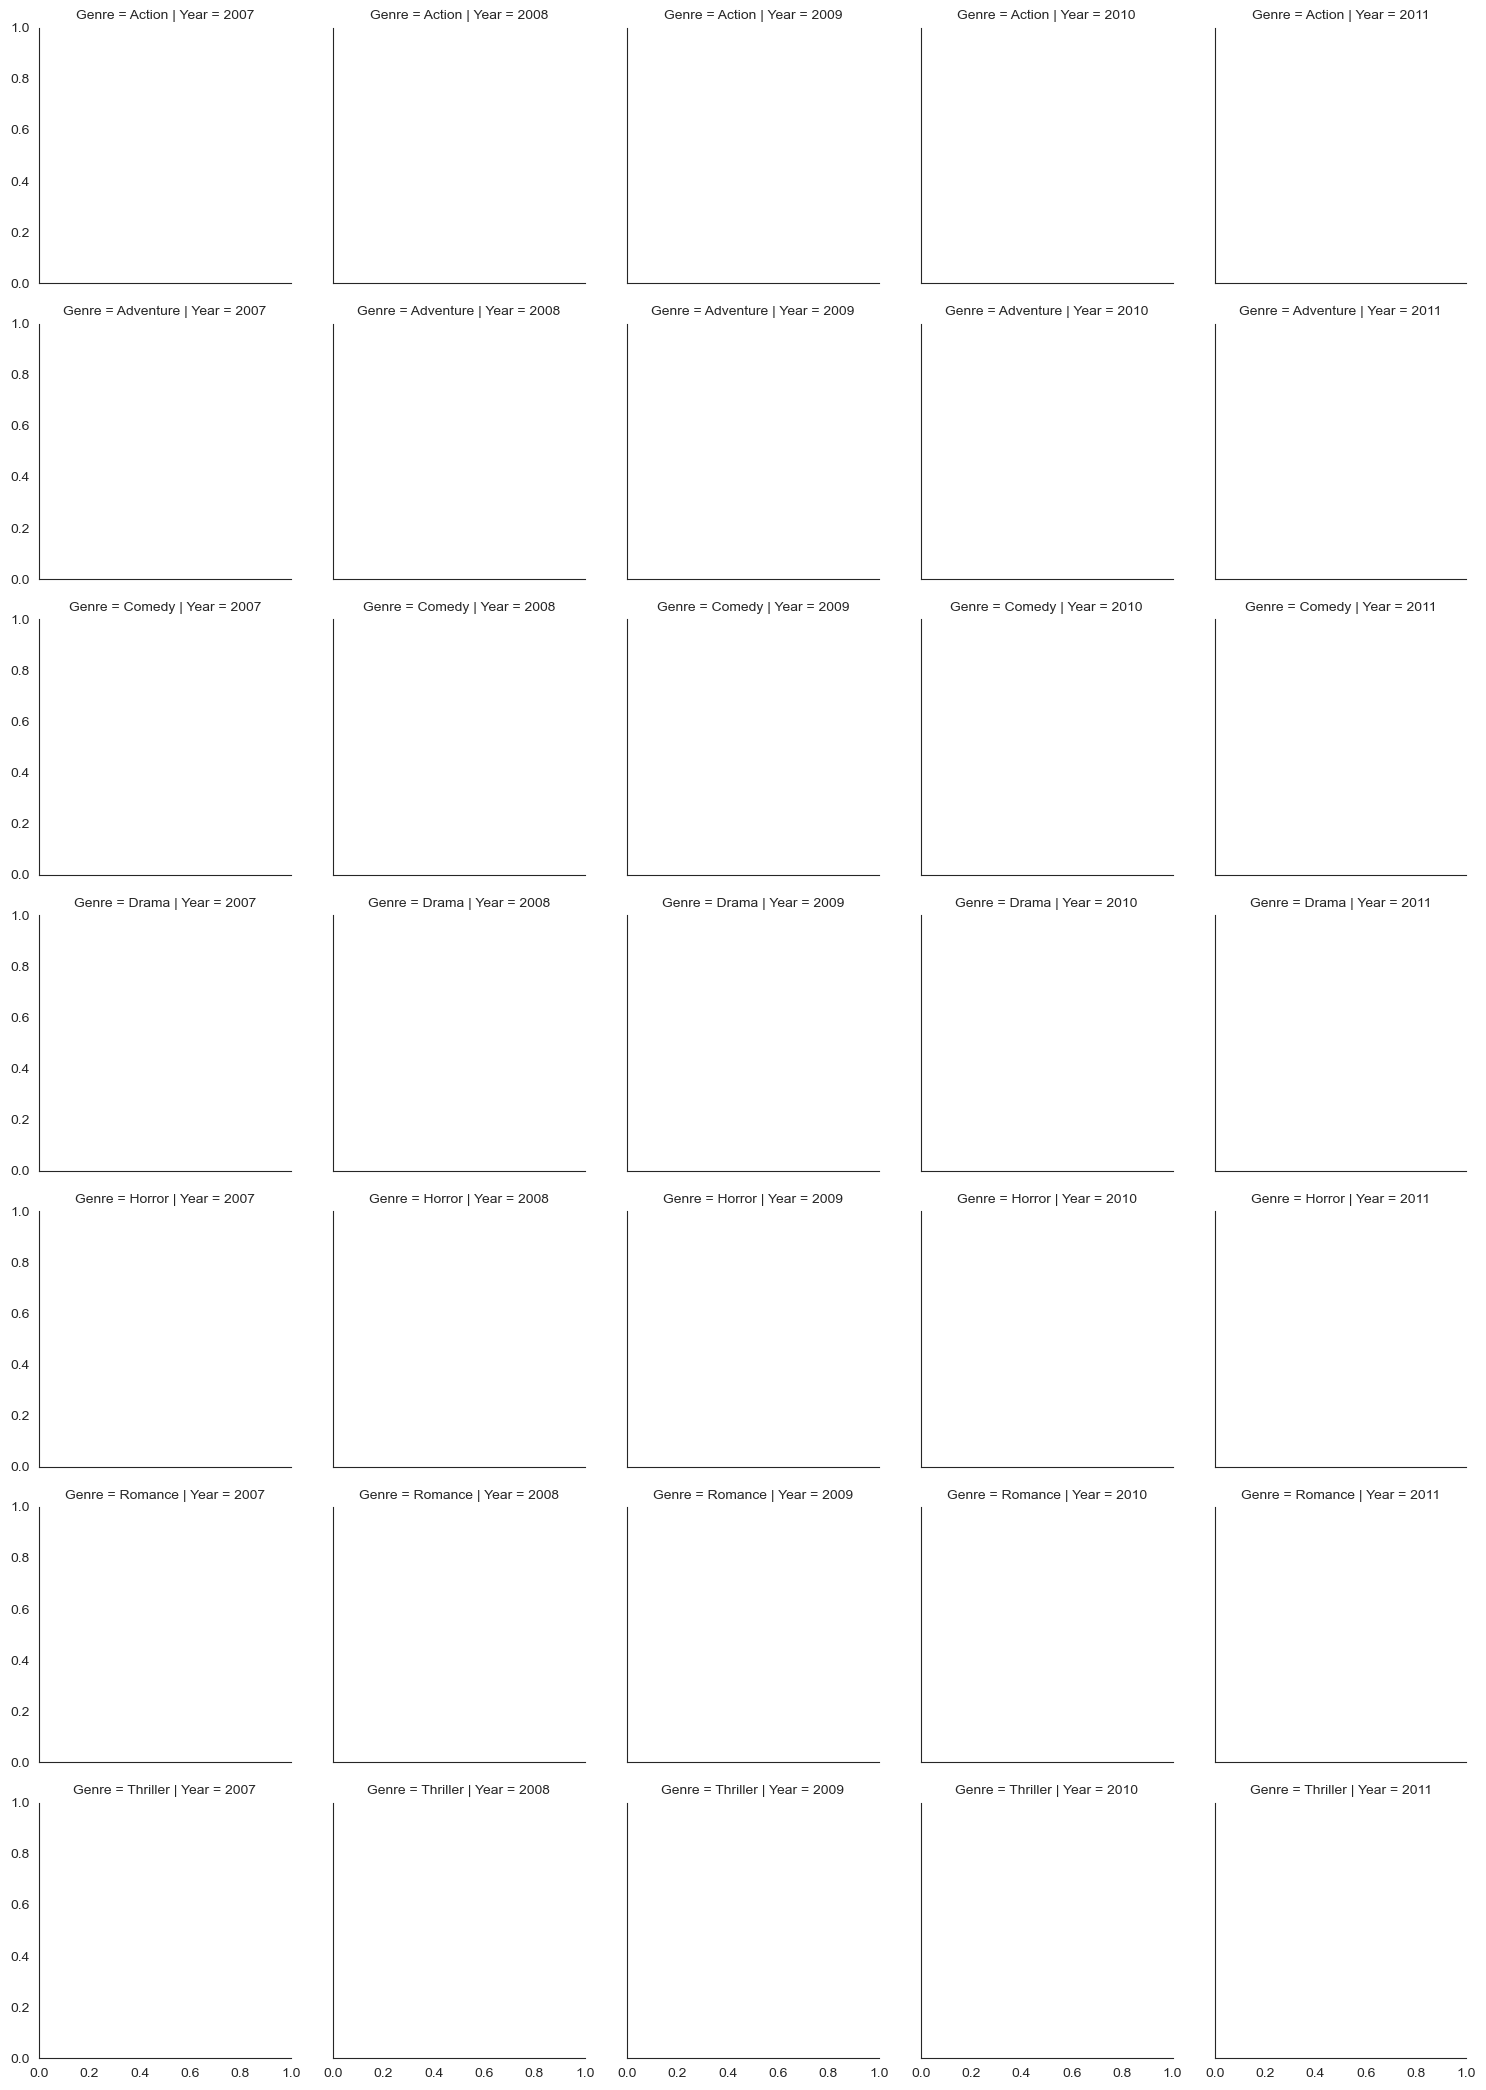

In [47]:
g = sns.FacetGrid (movies, row = 'Genre', col = "Year", hue='Genre')

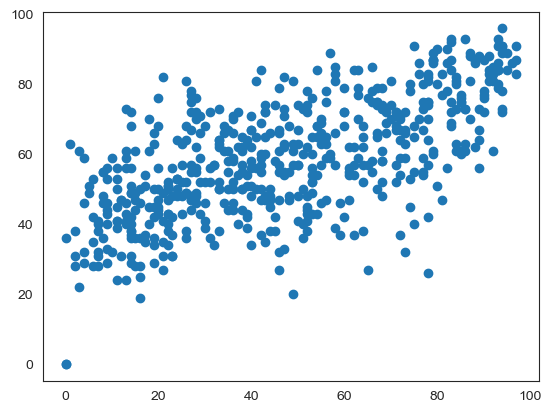

In [80]:
plt.scatter(movies.CriticRating,movies.AudienceRating)

### .map() --> Apply a plotting function to each facet's subset of the data.

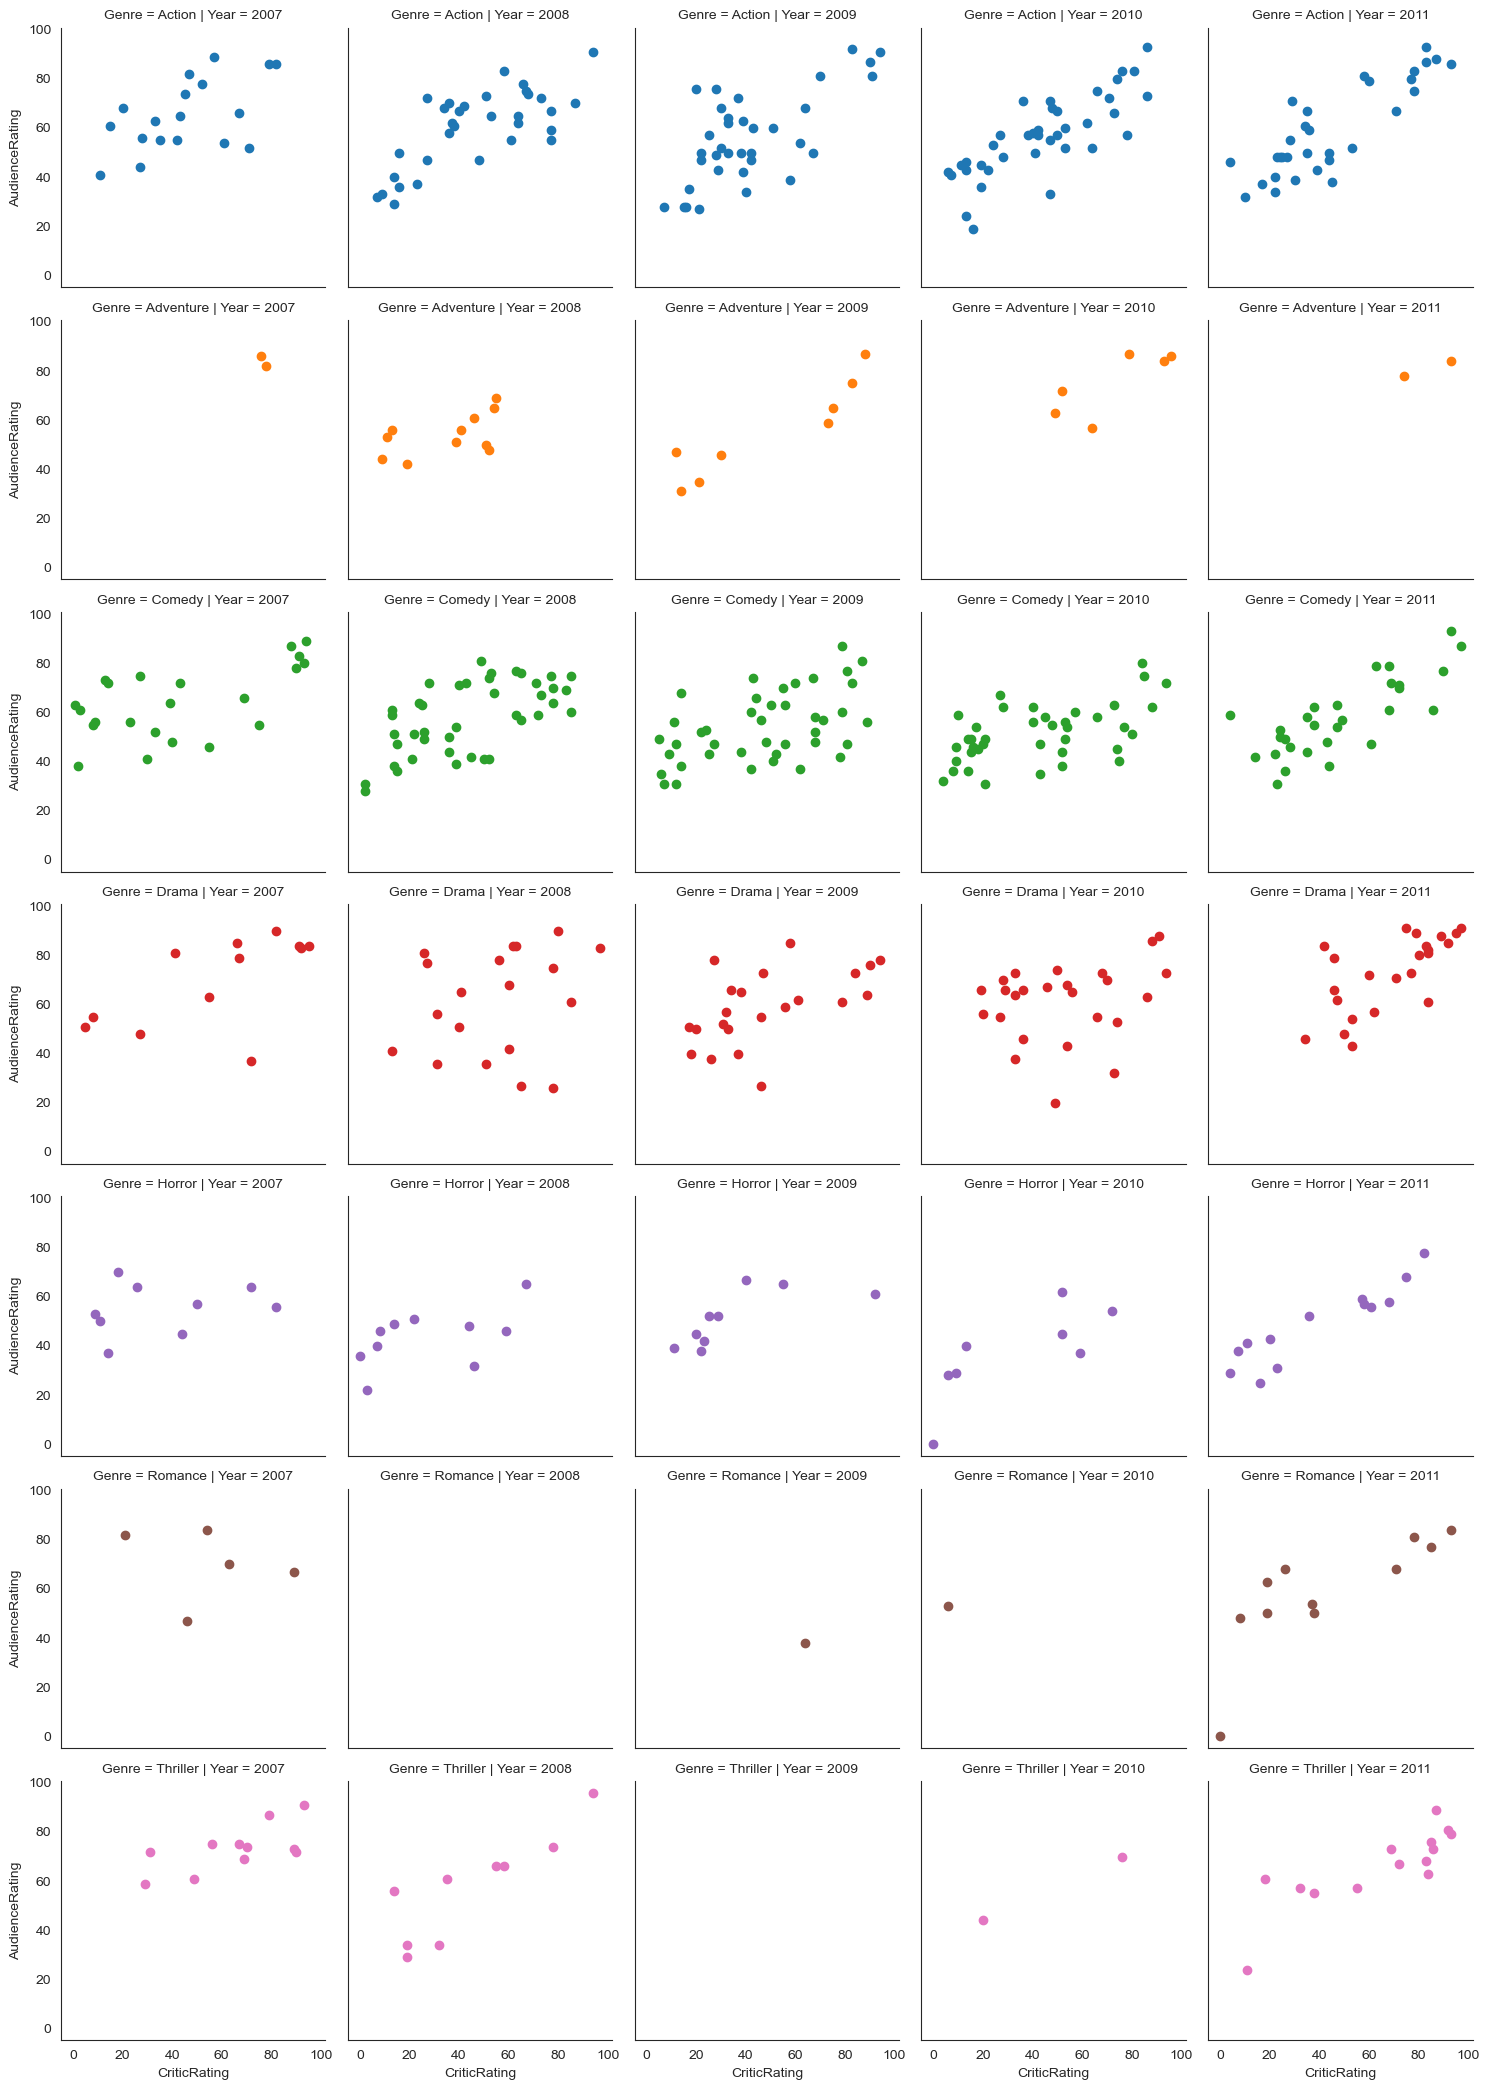

In [76]:
g = sns.FacetGrid(movies, row = "Genre", col = 'Year', hue = 'Genre')
g1 = g.map(plt.scatter,'CriticRating','AudienceRating')
# here you cant write: g1 = g.map(plt.scatter,x='CriticRating',y='AudienceRating')
# plt.scatter does not accept x and y as keyword arguments; instead, it expects these as positional arguments (i.e., the first two arguments).

###### 

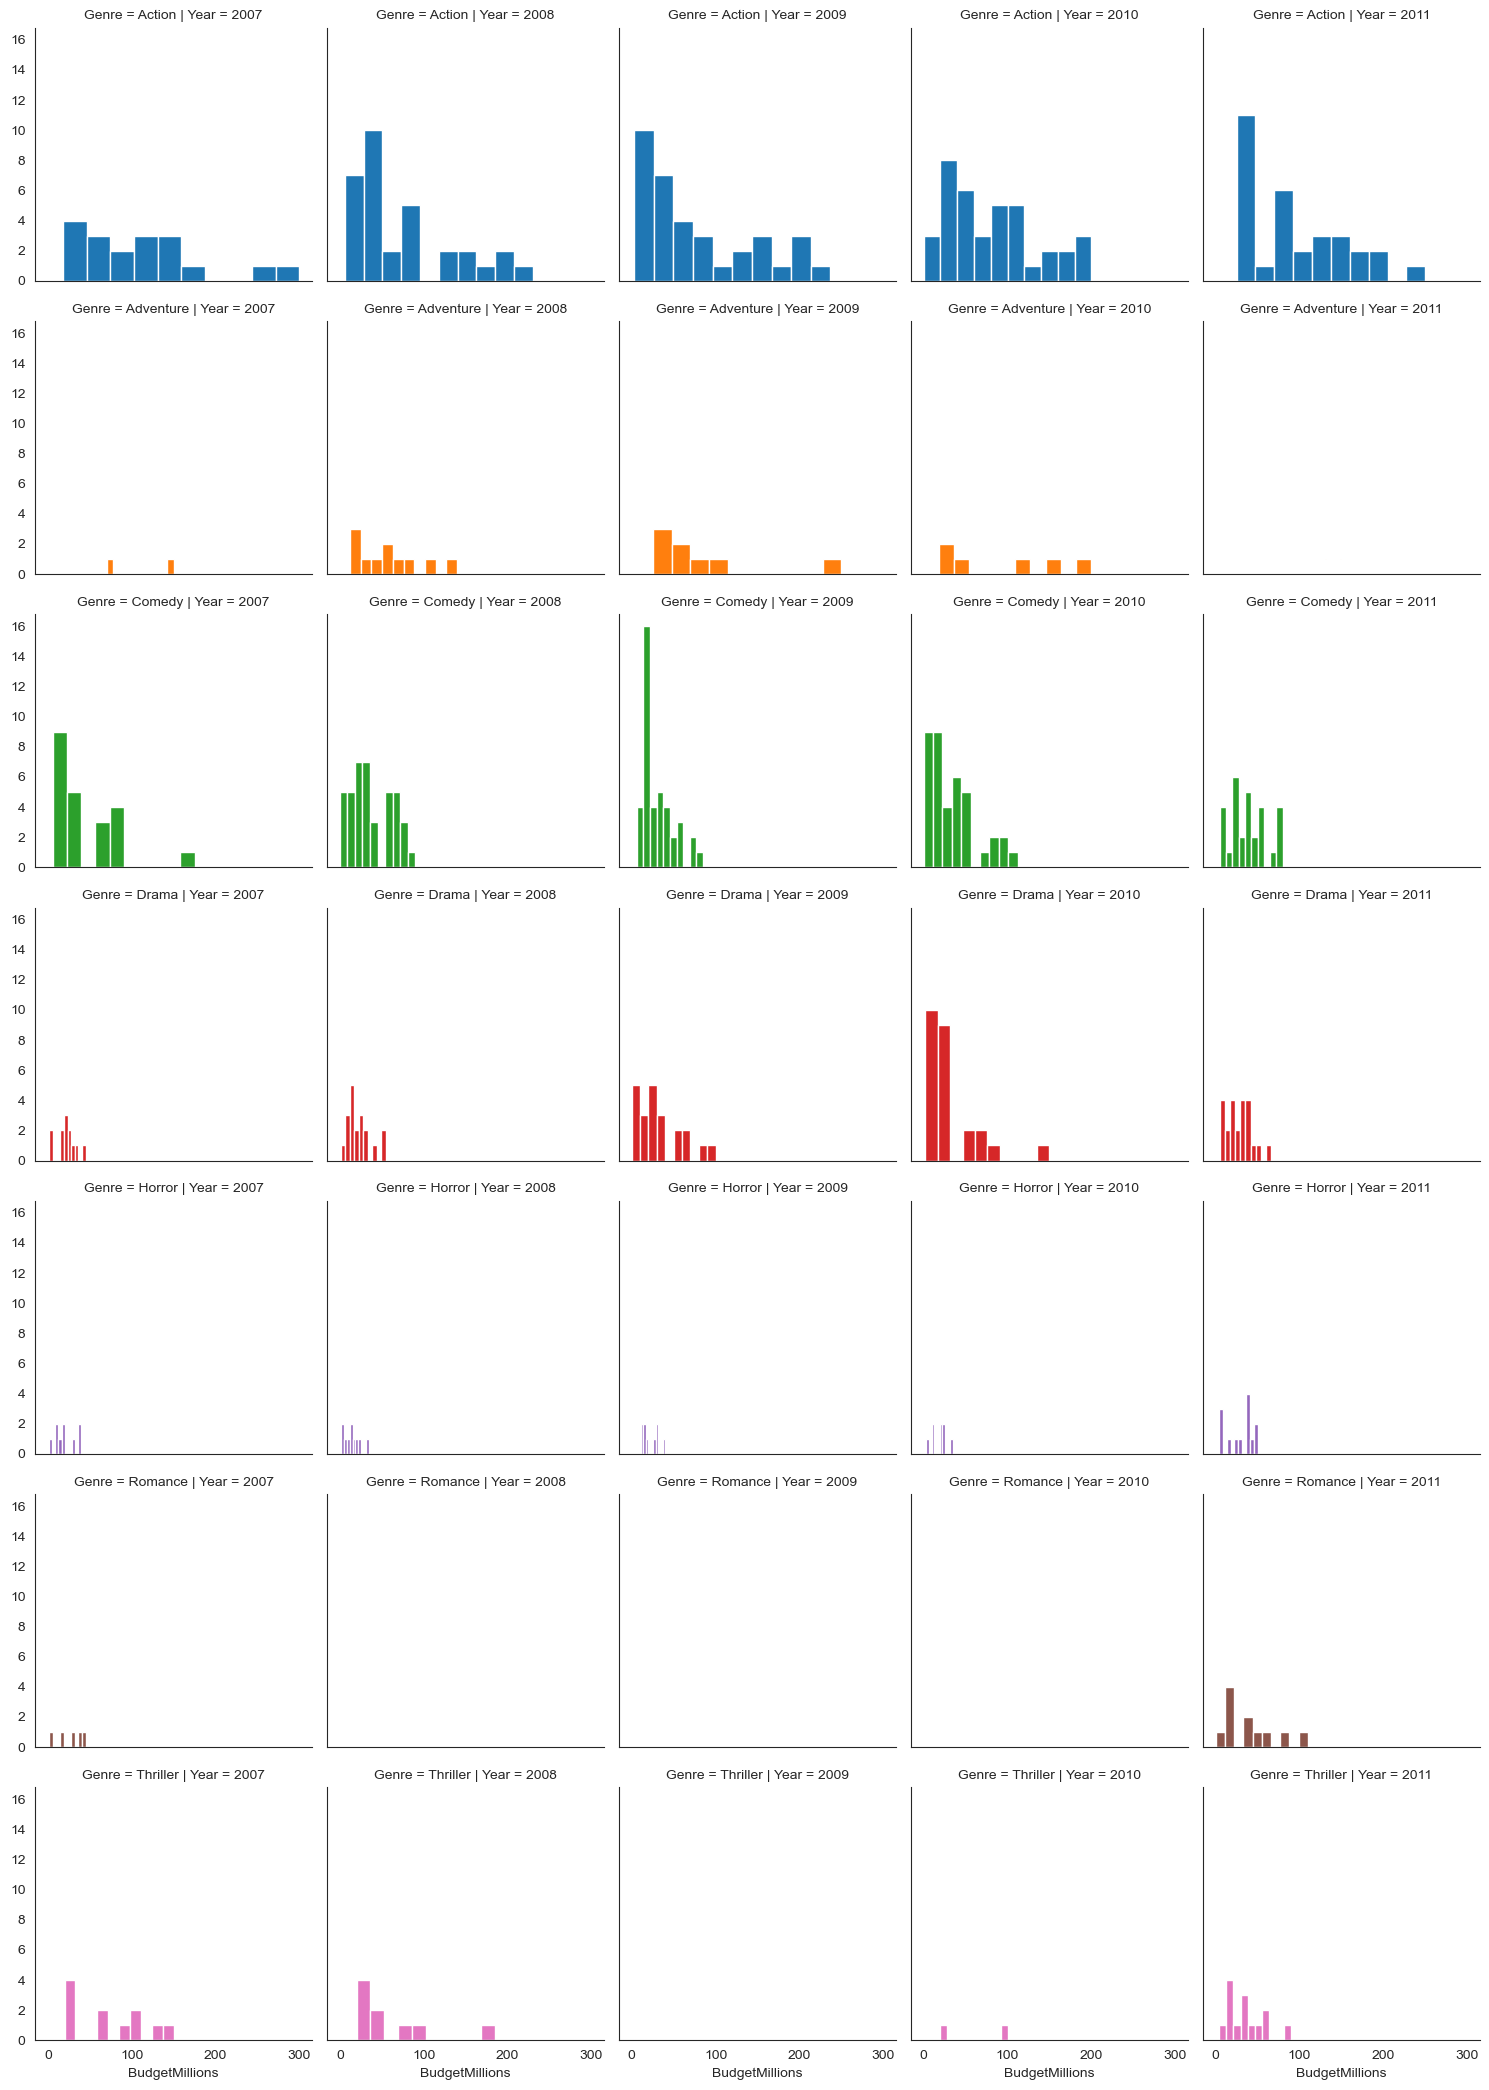

In [86]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g1 = g.map(plt.hist,'BudgetMillions') #scatterplots are mapped in facetgrid

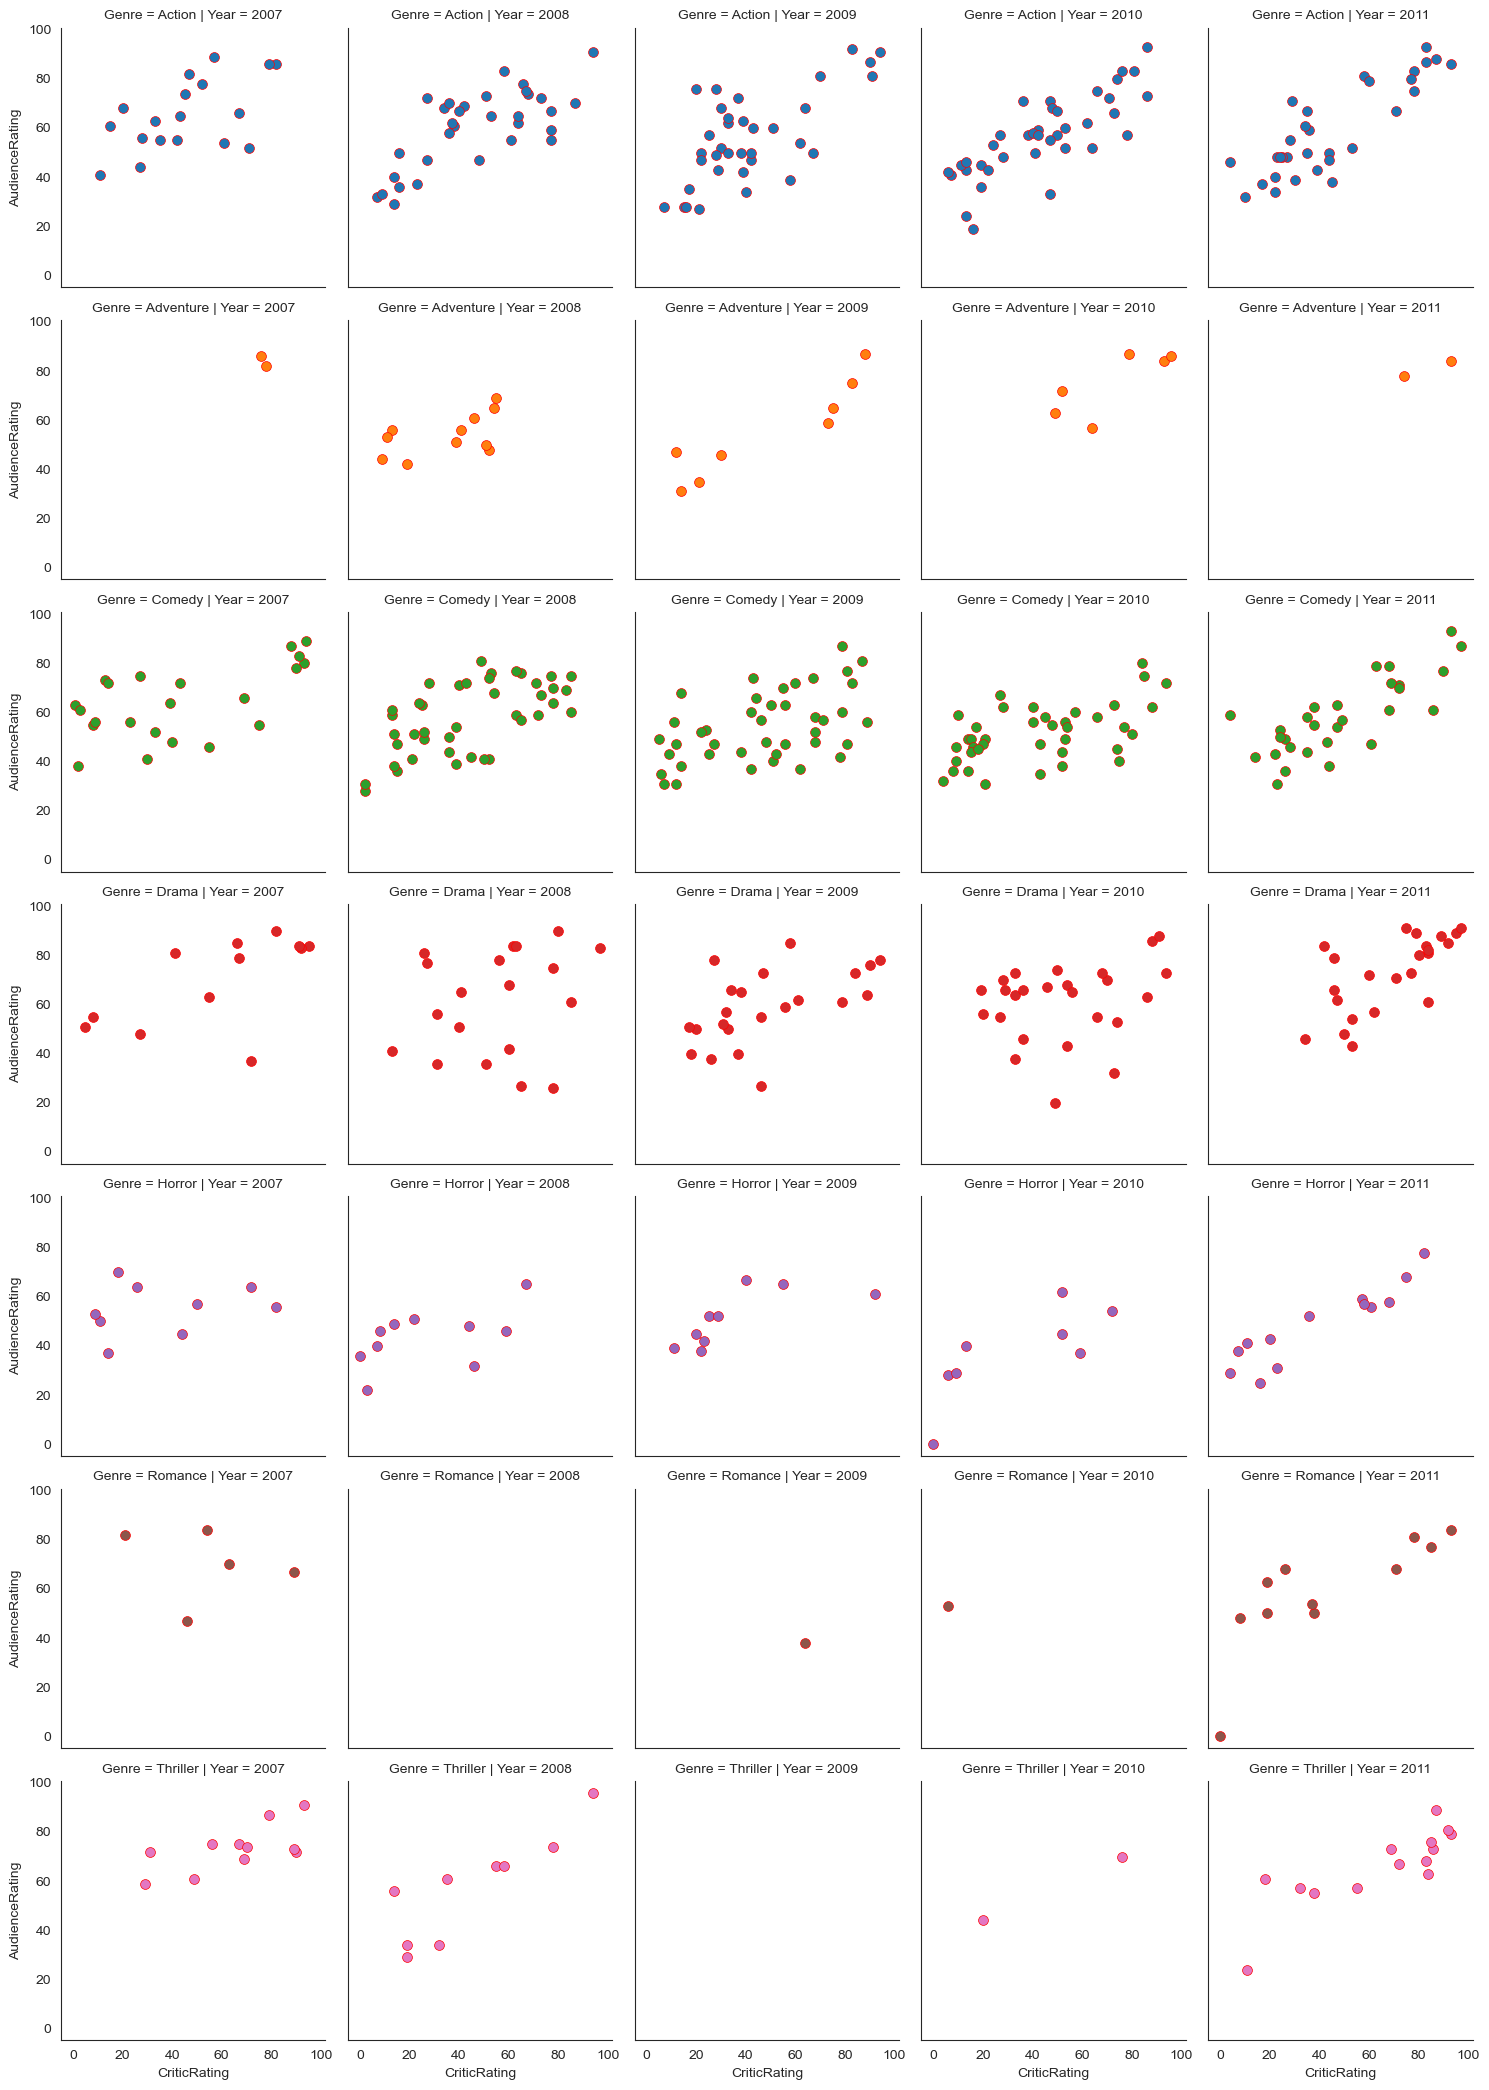

In [92]:
# Create a FacetGrid with rows by Genre and columns by Year
g =sns.FacetGrid (movies, row = 'Genre', col = 'Year', hue = 'Genre')

# Define keyword arguments for scatter plot
kws = dict(s=50, linewidth=0.5, edgecolor='red')

# Map scatter plot to each facet with additional keyword arguments
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws )

# Here **kws unpacks the keyword arguments from the kws dictionary and applies them to the plt.scatter function,customizing the appearance of the scatter plot markers as specified.
# You can have various arguments in different keywords for different dictionary:
# scatterplot, lineplot, boxplot, barplot, histogram, 

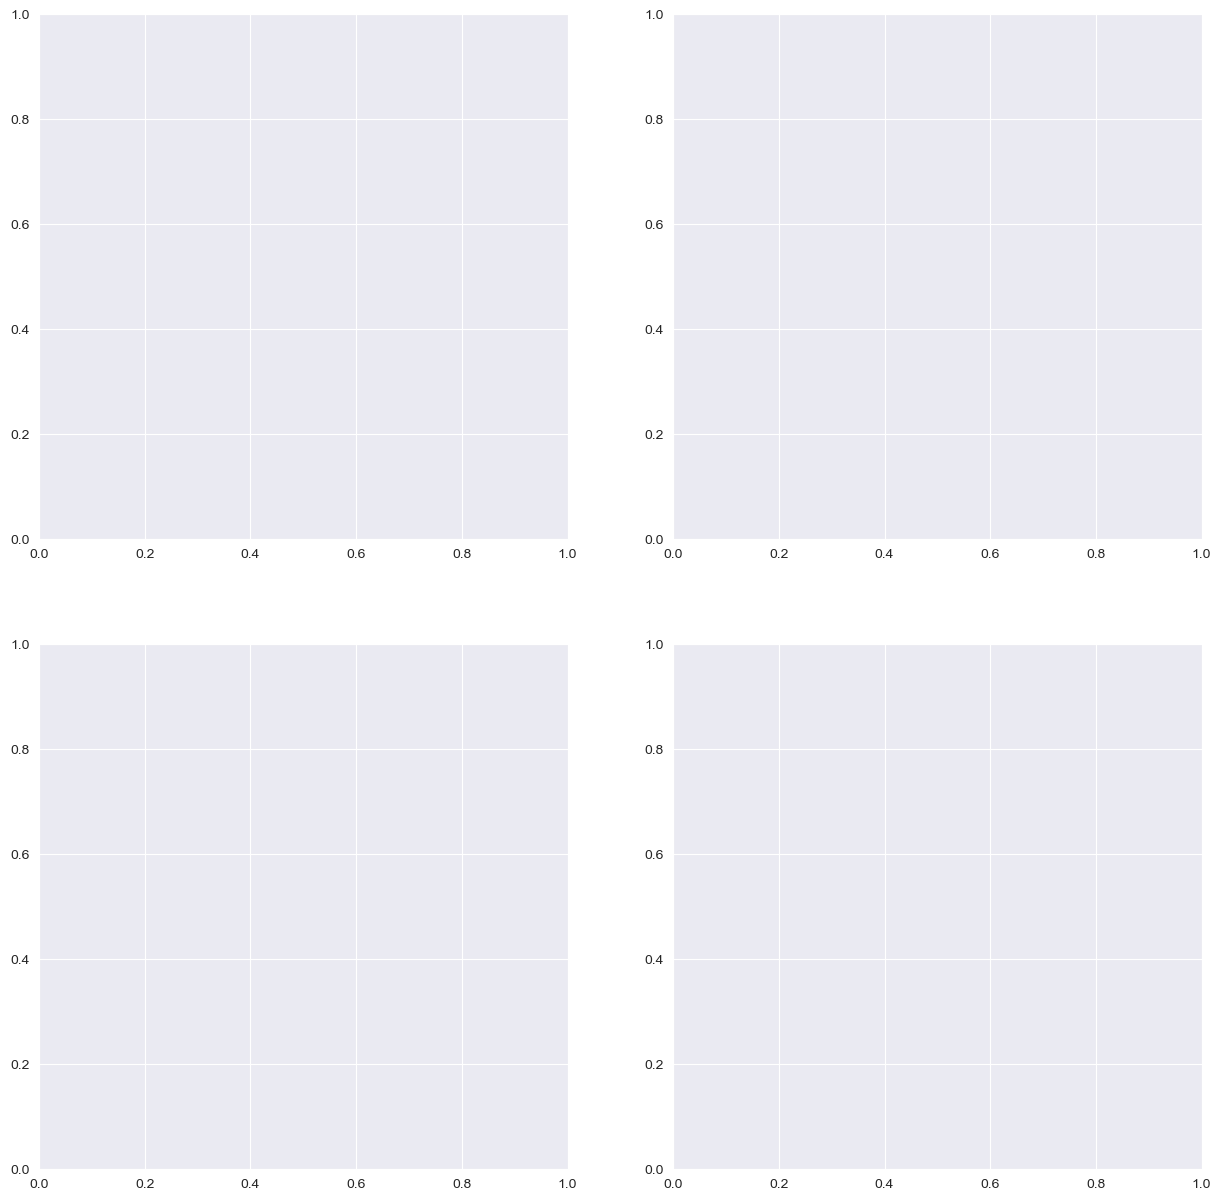

In [96]:
# python is not vectorize programming language

sns.set_style('darkgrid') #Setting the Seaborn Style:
f, axes = plt.subplots(2,2,figsize=(15,15))  #Creating a Grid of Subplots
#plt.subplots(): This function from the Matplotlib library creates a grid of subplots.
# It returns a figure object (f) and an array of axes (axes) that you can use to plot data.
# 2, 2 means a grid of 2 rows and 2 columns, resulting in 4 subplots in total.
# figsize=(15,15); the figure is set to be 15 inches wide and 15 inches high.

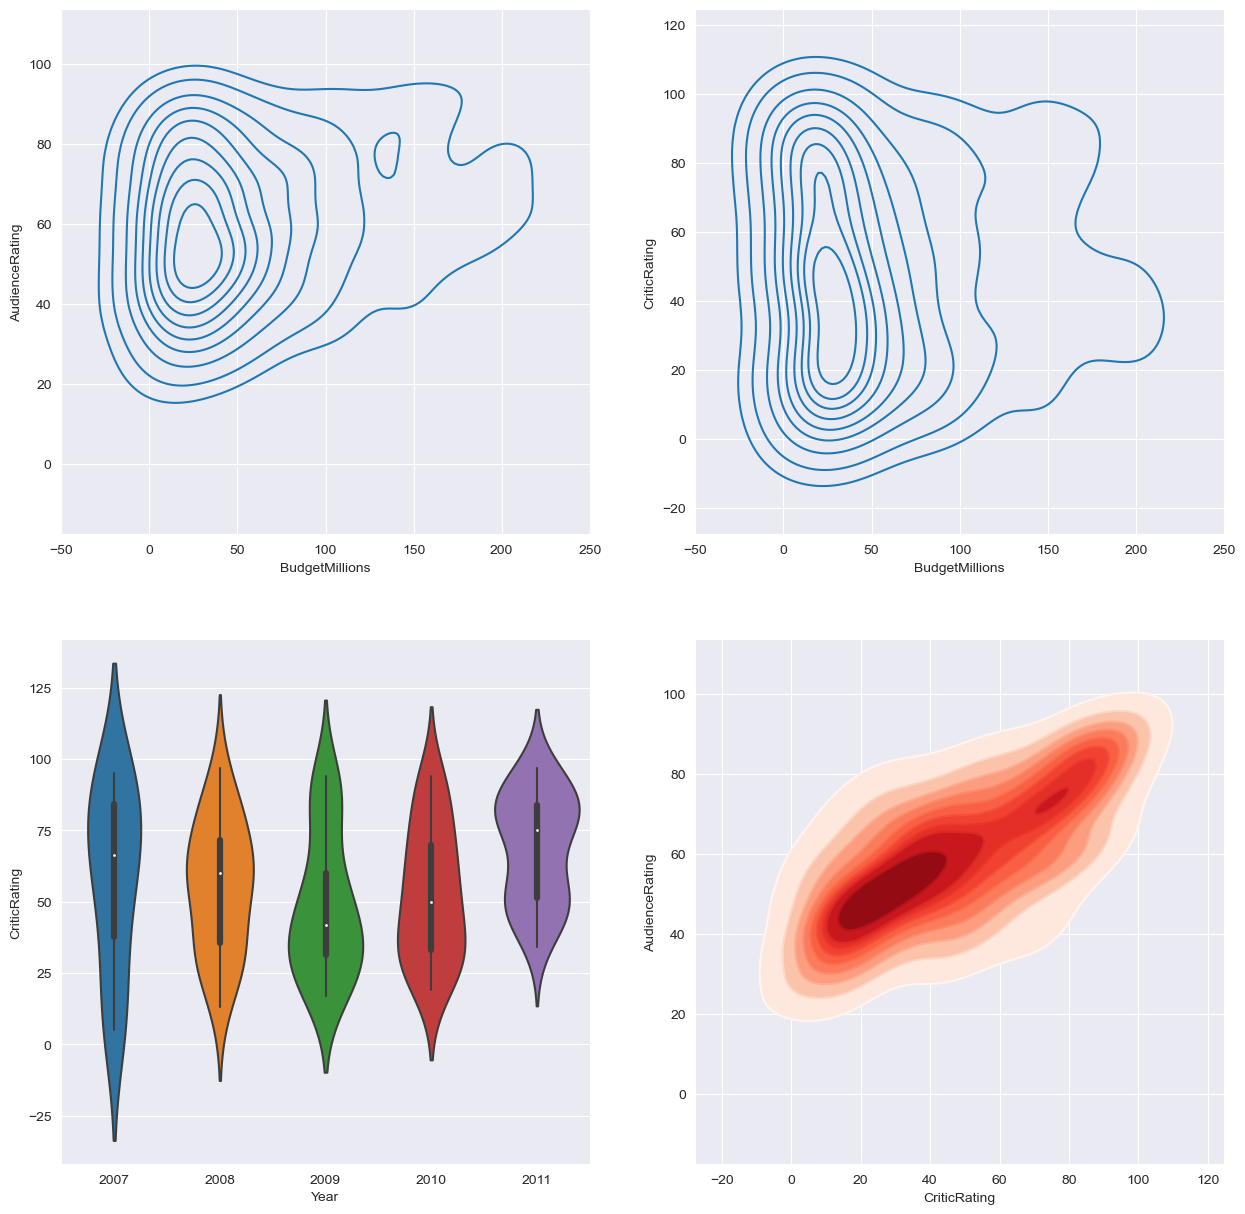

In [128]:
sns.set_style('darkgrid')
f, axes = plt.subplots (2,2, figsize = (15,15))

#KDE Plots:
k1 = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating,ax = axes[0,0]) # on the top-left subplot
k2 = sns.kdeplot(x=movies.BudgetMillions, y=movies.CriticRating,ax = axes[0,1])  # on the top-right subplot.

#Setting Axis Limits:
k1.set(xlim=(-50,250))
k2.set(xlim=(-50,250))
#These settings ensure that both KDE plots have the same x-axis range, making it easier to compare them visually.

z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=axes[1,0]) #Violinplot

#Overlaying KDE Plots:
k3 = sns.kdeplot(x=movies.CriticRating,y=movies.AudienceRating,shade = True,shade_lowest=False,cmap='Reds',ax=axes[1,1])
k3b = sns.kdeplot(x=movies.CriticRating,y=movies.AudienceRating,cmap='Reds',ax = axes[1,1])

#shade=True: When set to True, the area under the KDE curve is filled with color. 
# shade_lowest=False: When set to False, it prevents the lowest density areas from being shaded. 
# By default, the lowest density areas are shaded with a lighter color, which helps in emphasizing areas of higher density.

plt.show()

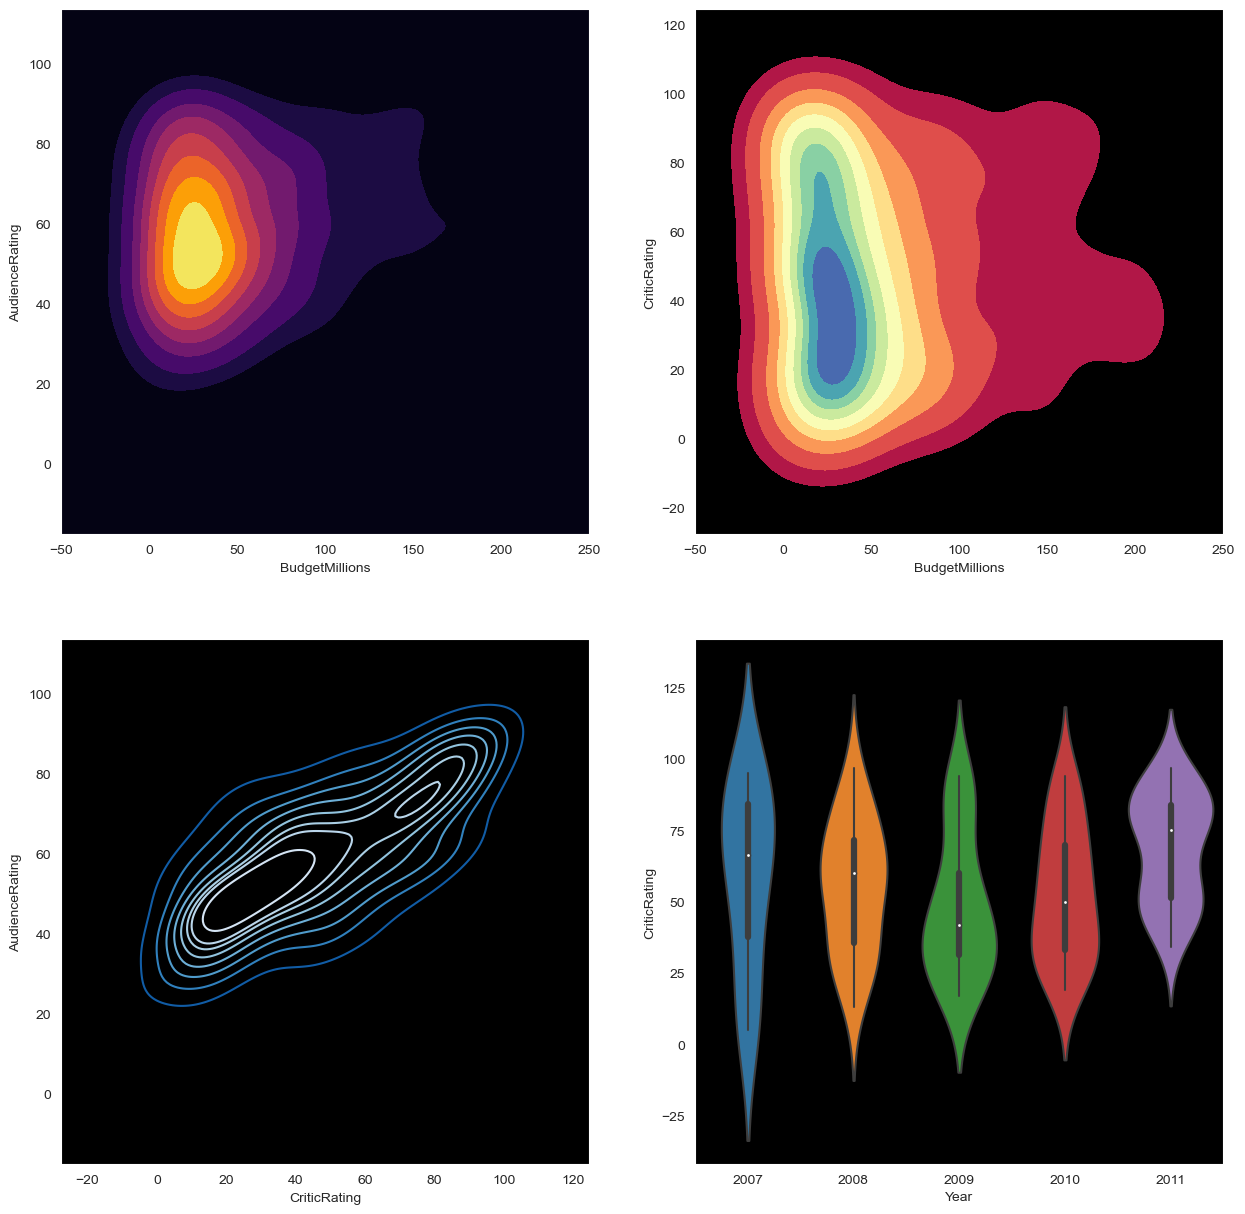

In [198]:
sns.set_style('dark',{'axes.facecolor':'black'})
f , axes = plt.subplots(2,2,figsize=(15,15))

#plot [0,0]
k1 = sns.kdeplot(x=movies.BudgetMillions,y=movies.AudienceRating, \
                 shade = True, shade_lowest=True,cmap = 'inferno', \
                 ax = axes[0,0])

#plot [0,1]
k2 = sns.kdeplot(x=movies.BudgetMillions, y=movies.CriticRating,\
                 shade=True, shade_lowest=False, cmap='Spectral',\
                 ax = axes[0,1])


#plot[1,0]
k3 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, \
                 shade = False,shade_lowest=True,cmap='Blues_r', \
                 ax=axes[1,0])

#plot[1,1]
vi = sns.violinplot(data=movies[movies.Genre=='Drama'], \
                   x='Year', y = 'CriticRating', ax=axes[1,1])

k1.set(xlim=(-50,250))
k2.set(xlim=(-50,250))

plt.show()